# EXERCICIO 2

Os algoritmos de poda de pool de classificadores usam um conjunto de validação (𝒱) para selecionar o melhor subconjunto de classificadores do pool original.

## Implementar e avaliar dois algoritmos de poda usando os seguintes conjunto de validação:
- (a) O conjunto original 𝒱;
- (b) O conjunto 𝒱’ contendo apenas as instâncias difíceis (kDN > 0.5) de 𝒱;
- (c) O conjunto 𝒱’ contendo apenas as instâncias fáceis (kDN < 0.5) de 𝒱.

## Algoritmos de Poda: 
- Reduce Error Prunning (REP) [12].
- Aggregation Ordering in Bagging (AGOB) [13].

## Classificadores-base: 
- Perceptron 
- Árvore de Decisão. 

## Usar: 
- Bagging para gerar o pool com 100 Perceptrons; 
- 10-fold cross-validation; 
- Combinar os classificadores usando voto majoritário; 
- Utilizar as medidas: taxa de acerto, AUC, g-mean e f-measure; 


## Descrição das Bases de Dados:

- Os dois conjuntos de dados escolhidos são chamados de kc1 e kc2, ambos com dados sobre detecção de falha em softwares. As bases escolhidas são binárias e são desbalanceadas, ou seja, possuem apenas duas classes em que a quantidade de exemplos de uma é maior do que a outra.

- A base kc1 possui 2109 observações, sendo 326 para a classe com falhas e 1783 para a classe que não tem falhas. Cada observação possui 22 atributos. Já a base kc2 possui 522 observações, sendo 105 para classe com falhas e 415 para a classe com observações perfeitas. Semelhante a base anterior, cada observação da classe kc2 possui 22 atributos. 

## Avaliação:
- Avalie a diversidade (escolha duas medidas de diversidade pareadas) e compare os cenários de (a), (b) e (c).

In [3]:
# importando o script que importa os resultados e gera os gráficos
from analise02 import *

In [4]:
# Definindo as metricas que serão utilizadas na analise
metricas = ['qtd modelos', 'q statistic', 'disagreement', 'acuracy', 'auc', 'fmeasure', 'gmean']

# Definindo os datasets usados na avaliação
data = ['kc1', 'kc2']

## 1. Comparação Entre os Conjuntos de Validação

A primeira investigação que buscamos fazer nesse documento é sobre as diferentes janelas de validação. Através dessa análise pretendemos responder as seguintes perguntas de pesquisa: 

- **O que acontece com a diversidade do ensemble ao variar a janela de validação?**
- **Qual o tipo de janela de validação mais adequada para a poda de classificadores? Completa, com observações fáceis ou difíceis?**

Para alcançar este objetivo, buscamos isolar as técnicas de poda que estamos investigando. Com isso realizamos uma análise utilizando estatísticas descritivas como média e desvio padrão em uma tabela para cada métrica de diversidade escolhida. 

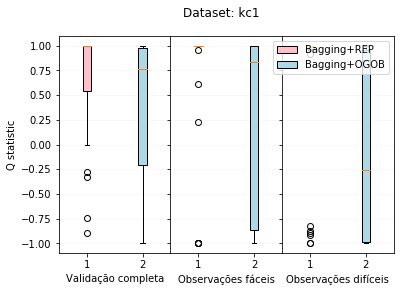

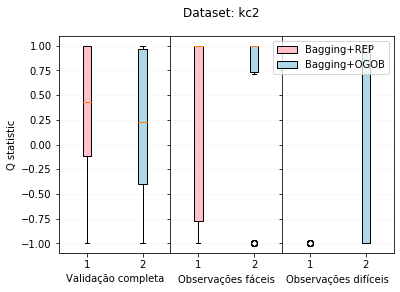

In [6]:
#Figura 1. Q statistic para os diferentes tipos de janelas de validação para todos os conjuntos de dados.
gerar_boxplot_metrica_geral_onedata(data[0], metricas[1])
gerar_boxplot_metrica_geral_onedata(data[1], metricas[1])

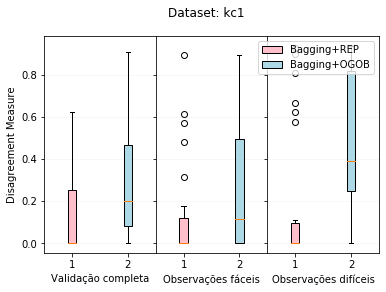

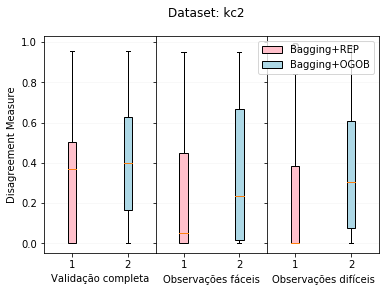

In [7]:
# Figura 2. Disagreement Measure para os diferentes tipos de janelas de validação para todos os conjunto de dados.
gerar_boxplot_metrica_geral_onedata(data[0], metricas[2])
gerar_boxplot_metrica_geral_onedata(data[1], metricas[2])

Sobre a janela com apenas observações fáceis, obteve-se que os modelos gerados não são independentes, ou seja, não apresentam boa diversidade. Isso pode ser observado pelas seguintes constatações: na Figura 1, no conjunto de dados kc1, a mediana da janela com observações fáceis se aproxima de 1, o que demonstra que os classificadores gerados concordam na maioria das suas classificações. Para o conjunto de dados kc2, observa-se que a mediana também se aproxima de 1, com diferença que os resultados variam para valores próximos a -0.75. Isso indica que na maioria das execuções a diversidade dos classificadores se espalha nos extremos, ou os classificadores acertam as mesmas observações ou erram em diferentes pontos. Para fortalecer essas discussões, ao analisarmos a métrica disagreement measure ilustrada na Figura 2, percebe-se que as observações fáceis apresentaram a pior diversidade quando comparada as outras duas janelas. Essa métrica verifica a proporção de exemplos que foram classificados diferentemente pelos modelos. Portanto, concluímos que utilizar uma janela com apenas observações fáceis não favorece a seleção de classificadores com boa diversidade.

Sobre a janela que utiliza todas as observações para validação, podemos observar para a métrica Q-statistc (Figura 1) que os seus valores variam apenas entre 0 e 1. Ao analisarmos esses resultados em comparação com outros tipos de janela, observa-se que esse comportamento é mais consistente sobre a independência dos classificadores. Consistente no sentido que na maioria das execuções os resultados variam entre independência (valores próximos a 0) a acertar o mesmo conjunto de observações (valores próximos a 1), enquanto que nos outros casos esses valores se espalham para os extremos. Ao considerarmos a mediana, apenas para o conjunto de dados kc2, utilizar toda a janela de validação apresenta melhores resultados que os demais conjuntos de validação. Isso também pode ser observado para a métrica disagreement measure (Figura 2).  No entanto, para a conjunto de dados kc1, observa-se que esse tipo de janela teve desempenho inferior a janela apenas com observações difíceis. Esses resultados indicam que as observações difíceis apresentam um grande peso para a seleção de classificadores com diversidade, dado que para determinados casos é melhor utilizar todos os dados ou apenas os difíceis.
    
Sobre a janela com observações difíceis, um ponto importante a se observar é a quantidade dessas observações para o conjunto de dados kc2. Conjunto de dados esse em que a janela com observações difíceis obteve diversidade inferior que a janela com todas as observações. Como pode ser visto na tabela 2, essa janela possui apenas 57 observações, um valor muito inferior ao tamanho das outras duas. Como observou-se nas discussões acima as observações difíceis possuem grande peso na seleção de diversidade dos classificadores, no entanto poucas observações difíceis podem prejudicar a geração. Com isso, observamos que na presença de poucas observações difíceis é mais adequado utilizar uma janela com todas as observações.
       
Por fim, a última análise sobre diversidade a discutirmos é sobre as técnicas de poda. Ao observamos a diversidade das técnicas na tabela 2, observa-se que em 100% dos casos a técnica OGOB apresenta maior diversidade em relação a técnica REP, independentemente da métrica. Isso explica-se porque a técnica OGOB seleciona os classificadores de forma complementar, ou seja, aqueles que naturalmente possuem desempenho diferente ao ensemble. Logo naturalmente obtém-se classificadores diversos. Já a técnica REP adiciona os modelos que possuem melhor desempenho, o que pode ser redundante. Para concluir, observa-se que apenas para janela completa de observações precisou de mais de 2 classificadores no conjunto, para as outras janelas 2 foram suficientes. Isso indica que muitas observações requerem mais classificadores.

## 2. Comparação Entre as Técnicas de Poda

A segunda investigação que buscamos fazer nesse documento é sobre as diferentes técnicas de poda elencadas nesse relatório. Através dessa análise buscamos discutir os resultados obtidos de modo a explicitar as diferenças entre as técnicas e o seu impacto para o desempenho final do sistema. 

In [18]:
#Tabela 2. Tabela com média e desvio padrão para todas as métricas investigadas nesse relatório
pd.read_excel("../Lista02/arquivos_lista02/geral.xlsx").fillna("-")

,Dataset,Validação,Nº de observações,Algoritmo,Nº modelos,Q statistic,Disagreement,Accuracy,AUC,F-measure,G-mean
0,kc1,Completa,1896,REP,2.533 (1.676),0.668 (0.567),0.149 (0.226),0.825 (0.055),0.536 (0.093),0.063 (0.164),0.101 (0.262)
1,-,-,-,OGOB,2.267 (0.907),0.337 (0.774),0.292 (0.284),0.813 (0.116),0.548 (0.09),0.115 (0.199),0.163 (0.283)
2,-,Fáceis,1564,REP,2 (0),0.693 (0.693),0.114 (0.229),0.807 (0.124),0.537 (0.084),0.087 (0.173),0.13 (0.258)
3,-,-,-,OGOB,2 (0),0.304 (0.867),0.286 (0.338),0.828 (0.071),0.534 (0.081),0.076 (0.175),0.11 (0.253)
4,-,Difíceis,195,REP,2 (0),0.612 (0.779),0.161 (0.307),0.744 (0.188),0.582 (0.112),0.182 (0.218),0.267 (0.33)
5,-,-,-,OGOB,2 (0),-0.069 (0.875),0.484 (0.319),0.819 (0.056),0.577 (0.121),0.149 (0.233),0.223 (0.348)
6,kc2,Completa,468,REP,6.267 (14.029),0.369 (0.669),0.304 (0.303),0.624 (0.249),0.642 (0.159),0.381 (0.275),0.434 (0.351)
7,-,-,-,OGOB,3.733 (3.657),0.193 (0.755),0.406 (0.293),0.649 (0.246),0.638 (0.16),0.372 (0.279),0.428 (0.348)
8,-,Fáceis,378,REP,2 (0),0.406 (0.902),0.235 (0.323),0.726 (0.169),0.579 (0.128),0.203 (0.272),0.247 (0.336)
9,-,-,-,OGOB,2 (0),0.515 (0.852),0.344 (0.337),0.694 (0.195),0.637 (0.149),0.329 (0.278),0.403 (0.362)


Sobre o conjunto de dados kc1, observa-se que a técnica OGOB para uma janela de observações fáceis, obteve a melhor acurácia. Mas em compensação a técnica REP com uma janela de observações difíceis obteve o melhor desempenho para as métricas AUC, F-measure e G-mean. Existe uma diferença significativa em relação a acurácia desses dois modelos (OGOB: 0,828 e REP: 0,744), no entanto se consideramos as outras métricas isso também ocorre. Se formos considerar a relevância das classificações indica-se o uso do método REP com a janela de observações difíceis, dado que além de ter melhor desempenho para ambas as classes (g-mean), obteve mais êxito em classificar observações mais relevantes (AUC, F-measure). Esses resultados podem ser explicados devido a janela com observações difíceis. De acordo com os resultados, orientar a poda baseado nesse tipo de janela favorece a classificação de exemplos mais relevantes para o problema. De outra maneira, o método OGOB com a janela de observações fáceis obteve melhor desempenho, devido a maior diversidade dos seus classificadores e por focar em observações fáceis de serem classificados. 

Sobre o conjunto de dados kc2, observa-se que o método OGOB com a janela de observações difíceis obteve a melhor acurácia de classificação. Mas em compensação o método REP para a janela completa conseguiu obter o melhor desempenho nas métricas AUC, f-measure e g-mean. Como discutido na seção anterior, a baixa quantidade de observações difíceis pode influenciar no desempenho de classificação. Por essa razão acredita-se que o método REP para a janela completa obteve os melhores desempenhos para essas métricas.

Conclui-se que o método OGOB conseguiu obter as melhores acurácias independentemente do conjunto de dados. Esses resultados podem estar relacionados com a inserção de classificadores complementares no conjunto, o que pode fornecer a integração de diferentes respostas. Já a técnica REP obteve os melhores desempenhos para as métricas AUC, f-measure e g-mean, independentemente do conjunto de dados.  Logo observa-se que a inserção de classificadores com bom desempenho na janela de validação favorece o desempenho para observações relevantes ao problema. 

# Conclusões

Este relatório teve como objetivo apresentar os resultados obtidos para a lista 02 da disciplina de Sistemas de Múltiplos Classificadores. Os experimentos foram realizados utilizando duas técnicas de poda de conjuntos de classificadores. Essas técnicas são: Reduce Error Prunning (REP) [12] e Aggregation Ordering in Bagging (AGOB) [13], ambas aplicadas ao método Bagging de geração de classificadores. Além disso, se investigou a diversidade dos classificadores gerados para três tipos de janelas de validação: uma janela com todos os dados, uma janela apenas com observações fáceis e uma janela apenas com observações difíceis. 

Sobre a diversidade gerada pelas janelas de validação, constatou-se que utilizar apenas observações fáceis não favorece a seleção de classificadores diversos pelas técnicas de poda. Isso foi demonstrado para ambas as técnicas de poda e também para os dois conjuntos de dados experimentados. Em paralelo a isso, obteve-se que utilizar uma janela com observações difíceis favorecem a seleção de classificadores diversos. Nesse quesito, observou-se que na presença de muitos dados é mais indicado utilizar apenas as observações difíceis. No entanto, na falta dessas observações é indicado utilizar todas as observações do conjunto de validação. Finalmente, constatou-se também que a técnica OGOB seleciona classificadores com mais diversidade que a técnica REP devido a sua forma de seleção complementar. 

Sobre o desempenho de classificação das técnicas mencionadas, não se encontrou uma relação direta do desempenho dos classificadores com as janelas de validação. Mas nesse sentido, constatou-se que o método OGOB, que apresentou maior diversidade, conseguiu obter as melhores acurácias independentemente do conjunto de dados. Esses resultados podem estar relacionados com a inserção de classificadores complementares no conjunto, o que pode fornecer a melhor integração de diferentes respostas. Já a técnica REP obteve os melhores desempenhos para as métricas AUC, f-measure e g-mean, independentemente do conjunto de dados.  Logo observa-se que a inserção de classificadores com bom desempenho na janela de validação favorece o desempenho para observações relevantes ao problema.

# Referencias

> [12] 	Fürnkranz, J., & Widmer, G. (1994). Incremental reduced error pruning. In Machine Learning Proceedings 1994 (pp. 70-77).

> [13] 	Martınez-Munoz, G., & Suárez, A. (2004). Aggregation ordering in bagging. In Proc. of the IASTED International Conference on Artificial Intelligence and Applications (pp. 258-263). Citeseer.